# clase que implementa una red predictiva

In [1]:
import PredictiveNet

Using TensorFlow backend.


### Red creada de forma manual

In [2]:
pn0 = PredictiveNet.PredictiveNet('pn0',
                    loopback_window=24, 
                    forward_window=4, 
                    num_lstm_layer=3, 
                    num_lstm_cells=128, 
                    num_dense_layers=0,
                    num_dense_cells=0,
                    batch_size=32,
                    suffle_enable=True,
                    verbose='full')


file "pn0_fitlog.csv" updated


In [ ]:
pn0.df = pn0.load_hist('EURUSD_H1.csv', sep=';', reindex_fillna=True, plot_it=True, debug_it=True)                

In [ ]:
pn0.dfapp = pn0.add_indicators( pn0.df,
                                'out',
                                ['CLOSE'], 
                                ['weekday', 'barsize'], 
                                ['weekday'], 
                                ['bollWidthRel', 'bollR', 'atr', 'SMAx3'], 
                                remove_weekends=True, 
                                add_applied=True, 
                                plot_it=True, 
                                starts=0, 
                                plot_len=1000)


In [ ]:

pn0.num_outputs = 1
pn0.num_inputs = pn0.dfapp.shape[1] - pn0.num_outputs
pn0.sts_df = pn0.series_to_supervised(pn0.dfapp, pn0.num_inputs, pn0.num_outputs, pn0.lbw, pn0.fww)


In [ ]:
pn0.sts_scaled, pn0.scaler = pn0.normalize_data(pn0.sts_df)


In [ ]:
pn0.x_train, pn0.y_train, pn0.x_validation, pn0.y_validation, pn0.x_test, pn0.y_test = pn0.prepare_training_data(pn0.sts_scaled, pn0.bs, 4, 1, 0.8, True)


In [ ]:
pn0.model, pn0.callbacks_list = pn0.build_net(True) 

In [ ]:
# Entreno la red
pn0.train_validate(1, True)

In [ ]:
# Testeo la red
pn0.test_rmse()

In [ ]:
# Hago test con predicciones
pn0.test_with_predictions()

In [ ]:
# Hago un test con una predicción realimentada
pn0.test_full_predictions()

### Red creada de forma automática

In [6]:
# Creo red neuronal por defecto. Carga datos de archivo csv y deja preparada para entrenamiento
pn1 = PredictiveNet.PredictiveNet('pn1',
                    loopback_window=24, 
                    forward_window=4, 
                    num_lstm_layer=3, 
                    num_lstm_cells=128, 
                    num_dense_layers=0,
                    num_dense_cells=128,
                    batch_size=32,
                    suffle_enable=True,
                    tvt_csv_file='EURUSD_H1.csv',
                    verbose='full')

file "pn1_fitlog.csv" updated


Train on 71040 samples, validate on 17760 samples
Epoch 1/1
 - 80s - loss: 0.0010 - acc: 0.2462 - val_loss: 2.6028e-04 - val_acc: 0.2389


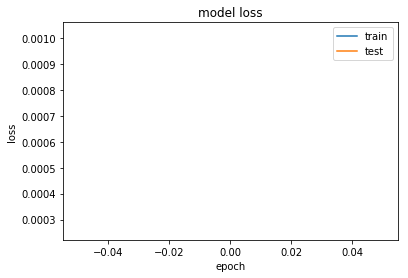

In [7]:
# Entreno la red
pn1.train_validate(1, True)

In [5]:
# Testeo la red
pn1.test_eval()

(0.00015150669442238234, 29.047061999460094)

In [ ]:
# Otro test
pn1.test_rmse()

In [ ]:
# Hago test con predicciones
pn1.test_with_predictions()

In [ ]:
# Hago un test con una predicción realimentada
pn1.test_full_predictions()